In [35]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('bike_dataset.csv')

In [37]:
df.head(5)

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [39]:
df['type_of_bike']=df['type_of_bike'].astype('category')

In [40]:
df.describe().round(2)

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,361.00,304.00,361.00,361.00,170.00,200.00
mean,839907.94,680.97,44.68,178.84,4.19,99.34
std,1052082.76,547.74,39.89,73.84,2.37,39.63
min,38000.00,87.80,8.00,55.00,1.01,25.00
25%,100000.00,164.42,20.00,118.00,2.80,79.50
50%,242000.00,618.00,30.00,169.00,3.22,100.00
75%,1459000.00,1051.50,55.00,216.00,5.07,129.12
max,7990000.00,2458.00,320.00,433.00,13.80,200.00


In [41]:
df.isna().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [42]:
df.dropna(subset=['acceleration_speed','top_speed'], inplace=True)

In [43]:
df.shape

(170, 9)

In [44]:
df.groupby('type_of_bike').mean()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
type_of_bike,,,,,,
Electric Bike,99898.093750,NaN,131.406250,107.875000,6.166562,72.312500
Petrol Bike,155588.550725,210.47971,47.331739,143.833333,3.735870,118.041522


In [45]:
def top_bikes(df, bike_type, sort_by, num_rows):
    df1 = df[df['type_of_bike'] == bike_type][['model_name','price','CC','mileage','acceleration_speed','top_speed']]
    df_sorted = df1.sort_values(sort_by, ascending=False).head(num_rows)
    return df_sorted

print('Costly 5 Electric Bike \n',top_bikes(df, 'Electric Bike', 'price', 5))
print('\n High Mileage Electric Bike \n',top_bikes(df, 'Electric Bike', 'mileage', 5))
print('\n Costly 5 Petrol Bike \n',top_bikes(df, 'Petrol Bike', 'price', 5))
print('\n High Mileage Petrol Bike \n',top_bikes(df, 'Petrol Bike', 'mileage', 5))

Costly 5 Electric Bike 
                  model_name   price  CC  mileage  acceleration_speed  \
14          One Moto Electa  199000 NaN    150.0                 3.3   
53                TVS iQube  166358 NaN     75.0                 4.2   
15            Odysse Evoqis  157000 NaN    140.0                 4.2   
20                EeVe Soul  140000 NaN    120.0                 8.0   
13  Kabira Mobility KM 4000  136990 NaN    150.0                 3.1   

    top_speed  
14       85.0  
53       78.0  
15       80.0  
20       55.0  
13      120.0  

 High Mileage Electric Bike 
               model_name   price  CC  mileage  acceleration_speed  top_speed
0  Gravton Motors Quanta   99000 NaN    320.0                 4.2       70.0
1      Simple Energy One  109999 NaN    236.0                 3.6      100.0
3     Oben Electric Rorr  102999 NaN    200.0                 3.0      100.0
4        Ola Electric S1   85099 NaN    181.0                 2.9      116.0
5    Ola Electric S1 Pro  1201

In [46]:
def bottom_bikes(df, bike_type, sort_by, num_rows):
    df1 = df[df['type_of_bike'] == bike_type][['model_name','price','CC','mileage','acceleration_speed','top_speed']]
    df_sorted = df1.sort_values(sort_by).head(num_rows)
    return df_sorted

print('\n Cheap 5 Electric Bike \n',bottom_bikes(df, 'Electric Bike', 'price', 5))
print('\n Low Mileage Electric Bike \n',bottom_bikes(df, 'Electric Bike', 'mileage', 5))
print('\n Cheap 5 Petrol Bike \n',bottom_bikes(df, 'Petrol Bike', 'price', 5))
print('\n Low Mileage Petrol Bike \n',bottom_bikes(df, 'Petrol Bike', 'mileage', 5))


 Cheap 5 Electric Bike 
                  model_name  price  CC  mileage  acceleration_speed  top_speed
41       Bounce Infinity E1  45099 NaN     83.0                 8.0       65.0
43  Hero Electric Optima HX  55580 NaN     82.0                 8.0       42.0
58             Odysse Racer  59500 NaN     70.0                 8.0       45.0
37   Hero Electric Flash LX  59640 NaN     85.0                10.0       42.0
59                BGauss B8  62999 NaN     70.0                11.0       50.0

 Low Mileage Electric Bike 
            model_name   price  CC  mileage  acceleration_speed  top_speed
61        Ampere Zeal   74490 NaN     70.0                13.8       55.0
58       Odysse Racer   59500 NaN     70.0                 8.0       45.0
59          BGauss B8   62999 NaN     70.0                11.0       50.0
53          TVS iQube  166358 NaN     75.0                 4.2       78.0
52  Ampere Magnus Pro   79966 NaN     75.0                10.0       55.0

 Cheap 5 Petrol Bike 
   

In [47]:
bikes = ['Electric Bike', 'Petrol Bike']
columns = ['model_name', 'price', 'CC', 'mileage', 'acceleration_speed', 'top_speed']
sort_by = ['price', 'mileage']

for bike in bikes:
    for sort in sort_by:
        df1 = df[df['type_of_bike'] == bike][columns]
        sorted_df = df1.sort_values(sort, ascending=sort=='price').head(5)
        print(f"\nTop 5 {bike} bikes sorted by {sort}:")
        print(sorted_df)



Top 5 Electric Bike bikes sorted by price:
                 model_name  price  CC  mileage  acceleration_speed  top_speed
41       Bounce Infinity E1  45099 NaN     83.0                 8.0       65.0
43  Hero Electric Optima HX  55580 NaN     82.0                 8.0       42.0
58             Odysse Racer  59500 NaN     70.0                 8.0       45.0
37   Hero Electric Flash LX  59640 NaN     85.0                10.0       42.0
59                BGauss B8  62999 NaN     70.0                11.0       50.0

Top 5 Electric Bike bikes sorted by mileage:
              model_name   price  CC  mileage  acceleration_speed  top_speed
0  Gravton Motors Quanta   99000 NaN    320.0                 4.2       70.0
1      Simple Energy One  109999 NaN    236.0                 3.6      100.0
3     Oben Electric Rorr  102999 NaN    200.0                 3.0      100.0
4        Ola Electric S1   85099 NaN    181.0                 2.9      116.0
5    Ola Electric S1 Pro  120149 NaN    181.0      

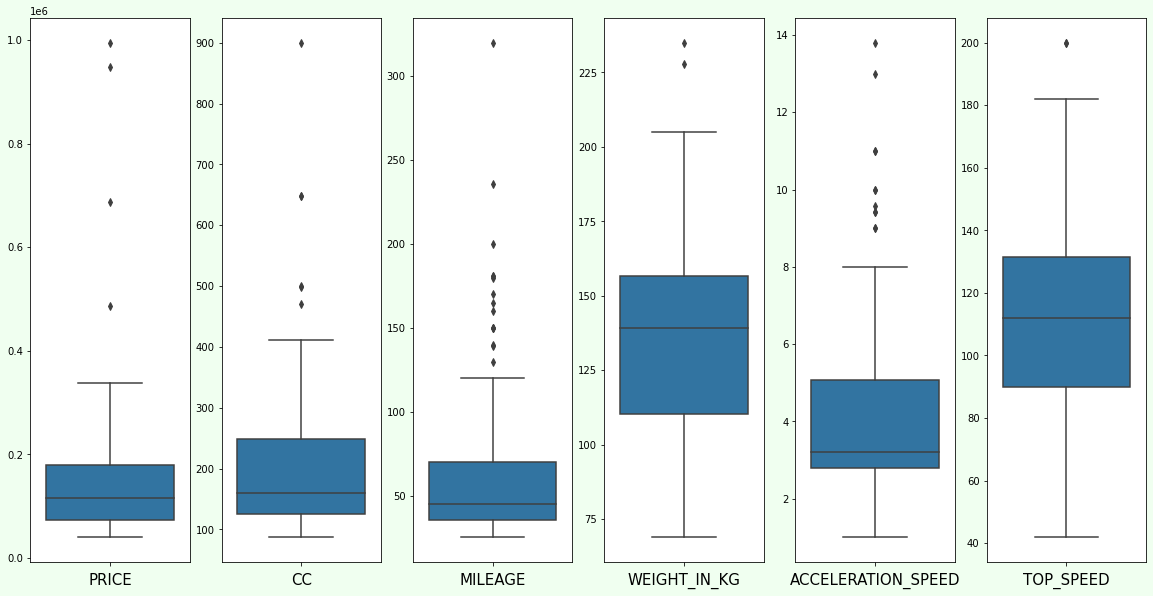

In [48]:
dfcont=df[['price','CC' ,'mileage','weight_in_kg','acceleration_speed','top_speed']]

plt.figure(figsize=(20,10), facecolor='HoneyDew')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(1,6,plotnumber)
        sns.boxplot(y=dfcont[column])
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('')
        
    plotnumber+=1

plt.show()

In [49]:
def remove_outliers(df, columns, method='iqr', lower=0.01, upper=0.99):
    if method == 'iqr':
        Q1 = df[columns].quantile(lower)
        Q3 = df[columns].quantile(upper)
        IQR = Q3 - Q1
        lower_bound = (Q1 - 1.5 * IQR)
        upper_bound = (Q3 + 1.5 * IQR)
    elif method == 'std':
        mean = df[columns].mean()
        std = df[columns].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    else:
        raise ValueError('Method not recognized')

    for col in columns:
        df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

    return df

num_col= ['price','mileage','weight_in_kg','acceleration_speed','top_speed']
df =remove_outliers(df, columns=num_col, method='iqr' )

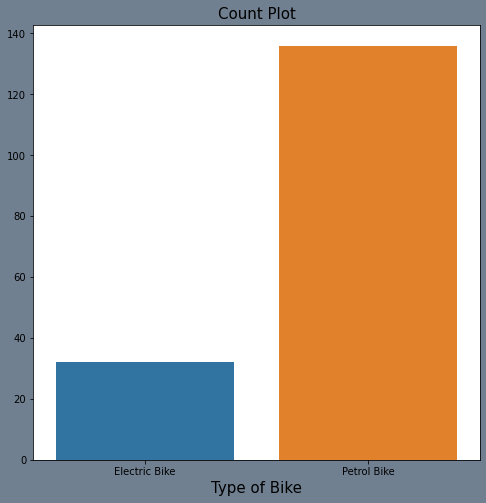

In [33]:
plt.figure(figsize=(8,8), facecolor='slategrey')
sns.countplot(x=df["type_of_bike"])
plt.title('Count Plot', fontsize=15)
plt.xlabel('Type of Bike', fontsize=15)
plt.ylabel('')
plt.show()

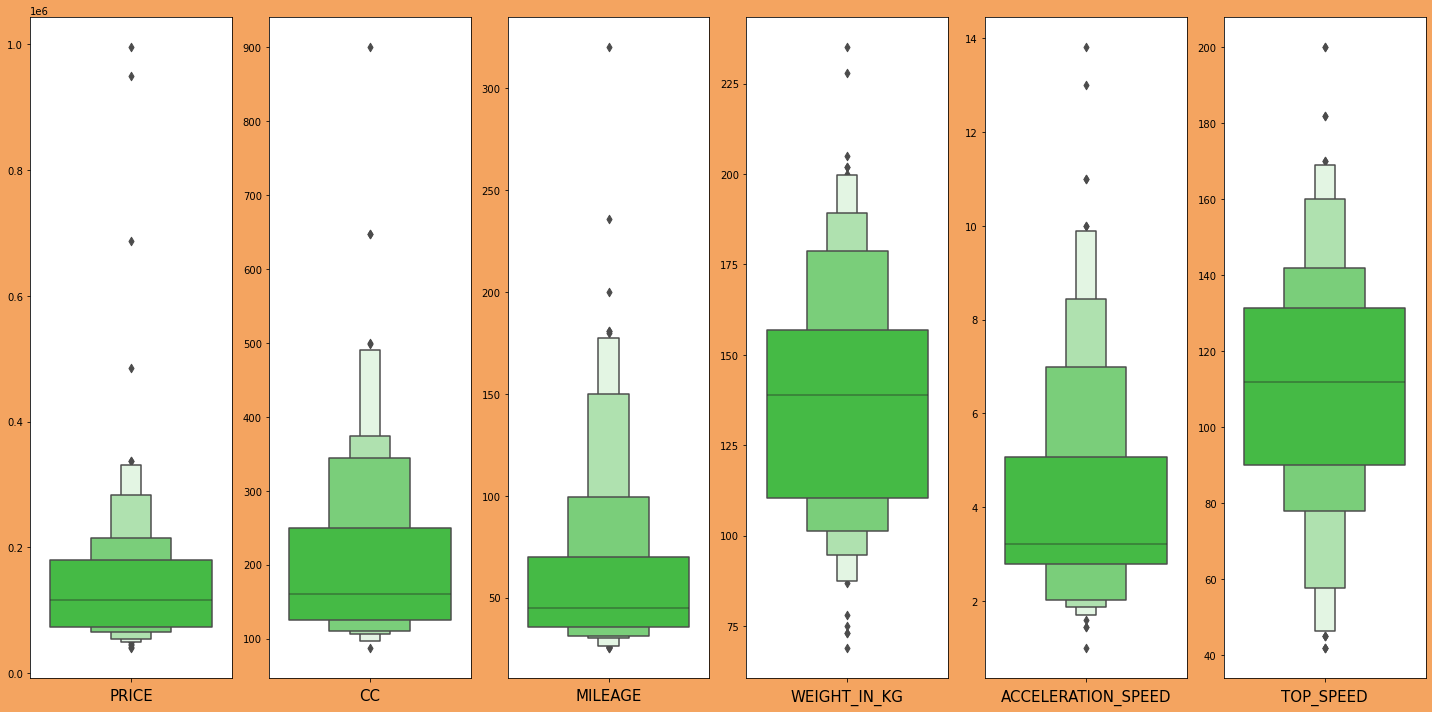

In [51]:
dfcont=df[['price','CC' ,'mileage','weight_in_kg','acceleration_speed','top_speed']]

plt.figure(figsize=(20,10), facecolor='sandybrown')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(1,6,plotnumber)
        sns.boxenplot(y=dfcont[column], color='limegreen')
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('')
    plotnumber+=1

plt.tight_layout()
plt.show()


In [ ]:
dfcont = df[['price', 'CC', 'mileage', 'weight_in_kg', 'acceleration_speed', 'top_speed']]

fig, axes = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
fig.suptitle('Boxplots of Numeric Features', fontsize=20)

for i, column in enumerate(dfcont):
    sns.boxplot(y=dfcont[column], ax=axes[i])
    axes[i].set_xlabel(column.upper(), fontsize=15)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show()


In [ ]:
dfcont=df[['price','CC' ,'mileage','weight_in_kg','acceleration_speed','top_speed']]

plt.figure(figsize=(20,20), facecolor='dodgerblue')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.histplot(x=dfcont[column],hue=df['type_of_bike'],multiple="stack" ,palette='hot' )
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('')
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(20,20), facecolor='orchid')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x=dfcont[column], y=df.type_of_bike,palette='afmhot')
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('Type of Bike',fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
dfcont1=df[['CC' ,'mileage','weight_in_kg','acceleration_speed','top_speed']]

plt.figure(figsize=(20,20), facecolor='SandyBrown')
plotnumber=1

for column in dfcont1:
    if plotnumber <=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(x=dfcont1[column], y=df.price, hue= df.type_of_bike, palette='prism' )
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('Price',fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
dfcont1 = df[['CC' ,'mileage','weight_in_kg','acceleration_speed','top_speed']]

fig, axs = plt.subplots(3, 2, figsize=(20, 20), facecolor='SandyBrown')
fig.suptitle('Scatterplot of Bike Features by Price and Type of Bike', fontsize=20)

for i, column in enumerate(dfcont1.columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.scatterplot(x=column, y='price', hue='type_of_bike', data=df, palette='prism', ax=ax)
    ax.set_xlabel(column.upper(), fontsize=15)
    ax.set_ylabel('Price', fontsize=15)

fig.text(0.5, 0.05, 'Bike Features', ha='center', fontsize=15)
plt.show()


In [ ]:
plt.figure(figsize=(20,20), facecolor='Plum')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.violinplot(x=dfcont[column],y=df.type_of_bike, palette='OrRd')
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('Type of Bike', fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(20,20), facecolor='LemonChiffon')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.swarmplot(x=dfcont[column],y=df.type_of_bike, hue=df.type_of_bike, palette="deep", size=5)
        plt.xlabel(column.upper(),fontsize=15)
        plt.ylabel('Type of Bike', fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(20,20), facecolor='lightskyblue')
plotnumber=1

for column in dfcont:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.stripplot(x=dfcont[column],y=df.type_of_bike,hue=df.type_of_bike, palette="gnuplot")
        plt.ylabel('Type of Bike', fontsize=15)
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(10,10), facecolor='Chocolate')
sns.heatmap(df.corr(), annot=True, linewidths=0.2, cmap='gist_earth')
plt.title('Heat Map')
plt.show()

In [ ]:
sns.clustermap(df.corr(), annot=True, linewidths=0.2, cmap='ocean')
plt.title('Cluster Map')
plt.show()

In [ ]:
g=sns.pairplot(df)
g.tick_params(labelsize=15)
plt.show()

In [ ]:
g=sns.pairplot(df, kind="hist")
g.tick_params(labelsize=15)
plt.show()

In [ ]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.tick_params(labelsize=15)
plt.show()

In [ ]:
g = sns.PairGrid(df, hue='type_of_bike')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, multiple="stack" )
g.add_legend(title="", adjust_subtitles=True, fontsize=15)
g.tick_params(labelsize=15)
plt.show()

In [ ]:
g = sns.PairGrid(df, hue='type_of_bike')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_diag(sns.histplot, multiple="stack")
g.add_legend(title="", adjust_subtitles=True, fontsize=15)
g.fig.suptitle('Pairwise Relationships by Bike Type', fontsize=20)
g.tick_params(labelsize=15)
plt.show()
